In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('VIF.csv')

In [3]:
df.head()

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed
0,0,-1.297858,0.327935,1.029572,-2.522071,-1.222428
1,1,-1.297686,0.329665,1.029509,-2.522418,-1.222429
2,2,-1.301822,0.332771,1.029448,-2.522673,-1.222428
3,3,-1.301852,0.333700,1.032845,-2.521639,-1.222430
4,4,-1.303118,0.335206,1.031807,-2.521900,-1.222429


In [4]:
df.drop(['Unnamed: 0'],axis=1)

,u_q,u_d,i_d,pm,motor_speed
0,-1.297858,0.327935,1.029572,-2.522071,-1.222428
1,-1.297686,0.329665,1.029509,-2.522418,-1.222429
2,-1.301822,0.332771,1.029448,-2.522673,-1.222428
3,-1.301852,0.333700,1.032845,-2.521639,-1.222430
4,-1.303118,0.335206,1.031807,-2.521900,-1.222429
...,...,...,...,...,...
814991,-1.246114,0.331475,1.029142,0.429853,-1.222428
814992,-1.250655,0.331701,1.029148,0.429751,-1.222437
814993,-1.246852,0.330946,1.029191,0.429439,-1.222430
814994,-1.249505,0.330987,1.029147,0.429558,-1.222432


# Multi-Linear Regression

## Normal Model

In [5]:
import statsmodels.formula.api as smf
model_normal = smf.ols('motor_speed~u_d+u_q+i_d+pm',data=df).fit()
model_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 3.588e+06
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:26:45   Log-Likelihood:                -9963.9
No. Observations:              814996   AIC:                         1.994e+04
Df Residuals:                  814991   BIC:                         2.000e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1124      0.000    396.577      0.000       0.112       0.113
u_d            0.1000      0.000    269.338      0.000       0.099       0.101
u_q            0.5208      0.000   1927.496      0.000       0.520       0.521
i_d           -0.7457      0.000  -2076.186      0.000      -0.746      -0.745
pm             0.0516      0.000    170.150      0.000       0.051       0.052
==============================================================================
Omnibus:                    58233.601   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           298558.403
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                       5.957   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
acc_normal=np.round(model_normal.rsquared,3)
err_normal=np.round(model_normal.mse_resid,4)
print("Normal Model Accuracy is",acc_normal)
print("Normal Model Error is",err_normal)

Normal Model Accuracy is 0.946
Normal Model Error is 0.06


## Models with Data Transformation

### Quadratic Model

In [7]:
df['i_d_sq'] = df['i_d']**2
df['u_q_sq'] = df['u_q']**2
df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed,i_d_sq,u_q_sq
0,0,-1.297858,0.327935,1.029572,-2.522071,-1.222428,1.060019,1.684434
1,1,-1.297686,0.329665,1.029509,-2.522418,-1.222429,1.059889,1.683990
2,2,-1.301822,0.332771,1.029448,-2.522673,-1.222428,1.059763,1.694740
3,3,-1.301852,0.333700,1.032845,-2.521639,-1.222430,1.066769,1.694819
4,4,-1.303118,0.335206,1.031807,-2.521900,-1.222429,1.064626,1.698117
...,...,...,...,...,...,...,...,...
814991,998065,-1.246114,0.331475,1.029142,0.429853,-1.222428,1.059133,1.552800
814992,998066,-1.250655,0.331701,1.029148,0.429751,-1.222437,1.059146,1.564137
814993,998067,-1.246852,0.330946,1.029191,0.429439,-1.222430,1.059233,1.554640
814994,998068,-1.249505,0.330987,1.029147,0.429558,-1.222432,1.059143,1.561262


In [8]:
model_squared = smf.ols('motor_speed~u_d+u_q+i_d+pm+i_d_sq+u_q_sq',data=df).fit()
model_squared.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 2.523e+06
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:26:48   Log-Likelihood:                 10687.
No. Observations:              814996   AIC:                        -2.136e+04
Df Residuals:                  814989   BIC:                        -2.128e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0140      0.001     22.225      0.000       0.013       0.015
u_d            0.0881      0.000    236.580      0.000       0.087       0.089
u_q            0.5205      0.000   1338.706      0.000       0.520       0.521
i_d           -0.7418      0.000  -1536.468      0.000      -0.743      -0.741
pm             0.0477      0.000    160.424      0.000       0.047       0.048
i_d_sq         0.0241      0.000     55.905      0.000       0.023       0.025
u_q_sq         0.0641      0.000    186.180      0.000       0.063       0.065
==============================================================================
Omnibus:                    95127.380   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           797205.207
Skew:                          -0.254   Prob(JB):                         0.00
Kurtosis:                       7.819   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
acc_squared=np.round(model_squared.rsquared,3)
err_squared=np.round(model_squared.mse_resid,4)
print("Quadratic Model Accuracy is",acc_squared)
print("Quadratic Model Error is",err_squared)

Quadratic Model Accuracy is 0.949
Quadratic Model Error is 0.057


### Cubic Model

In [10]:
df['i_d_cb'] = df['i_d']**3
df['u_q_cb'] = df['u_q']**3
df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed,i_d_sq,u_q_sq,i_d_cb,u_q_cb
0,0,-1.297858,0.327935,1.029572,-2.522071,-1.222428,1.060019,1.684434,1.091367,-2.186155
1,1,-1.297686,0.329665,1.029509,-2.522418,-1.222429,1.059889,1.683990,1.091165,-2.185291
2,2,-1.301822,0.332771,1.029448,-2.522673,-1.222428,1.059763,1.694740,1.090970,-2.206249
3,3,-1.301852,0.333700,1.032845,-2.521639,-1.222430,1.066769,1.694819,1.101806,-2.206403
4,4,-1.303118,0.335206,1.031807,-2.521900,-1.222429,1.064626,1.698117,1.098489,-2.212846
...,...,...,...,...,...,...,...,...,...,...
814991,998065,-1.246114,0.331475,1.029142,0.429853,-1.222428,1.059133,1.552800,1.089999,-1.934966
814992,998066,-1.250655,0.331701,1.029148,0.429751,-1.222437,1.059146,1.564137,1.090018,-1.956196
814993,998067,-1.246852,0.330946,1.029191,0.429439,-1.222430,1.059233,1.554640,1.090153,-1.938405
814994,998068,-1.249505,0.330987,1.029147,0.429558,-1.222432,1.059143,1.561262,1.090014,-1.950805


In [11]:
model_cb = smf.ols('motor_speed~u_d+u_q+i_d+pm+i_d_sq+u_q_sq+i_d_cb+u_q_cb',data=df).fit()
model_cb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 3.120e+06
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:26:50   Log-Likelihood:             2.0621e+05
No. Observations:              814996   AIC:                        -4.124e+05
Df Residuals:                  814987   BIC:                        -4.123e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2360      0.001   -377.515      0.000      -0.237      -0.235
u_d            0.0544      0.000    183.235      0.000       0.054       0.055
u_q            0.5889      0.001    889.579      0.000       0.588       0.590
i_d           -0.9489      0.000  -1972.372      0.000      -0.950      -0.948
pm             0.0455      0.000    194.629      0.000       0.045       0.046
i_d_sq         0.3587      0.001    615.990      0.000       0.358       0.360
u_q_sq         0.0814      0.000    248.884      0.000       0.081       0.082
i_d_cb         0.1950      0.000    697.219      0.000       0.194       0.196
u_q_cb        -0.0074      0.000    -21.910      0.000      -0.008      -0.007
==============================================================================
Omnibus:                   119795.345   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1648259.196
Skew:                          -0.226   Prob(JB):                         0.00
Kurtosis:                       9.952   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
acc_cb=np.round(model_cb.rsquared,3)
err_cb=np.round(model_cb.mse_resid,4)
print("Cubic Model Accuracy is",acc_cb)
print("Cubic Model Error is",err_cb)

Cubic Model Accuracy is 0.968
Cubic Model Error is 0.0353


Before applying the cuberoot and squareroot model first we will check for neagtive values because root of negative values cannot be possible. 

#### Checking for Negative Values in columns 

In [13]:
(df['motor_speed']<0).value_counts()

True     413505
False    401491
Name: motor_speed, dtype: int64

In [14]:
(df['u_q']<0).value_counts()

False    422390
True     392606
Name: u_q, dtype: int64

In [15]:
(df['i_d']<0).value_counts()

False    495106
True     319890
Name: i_d, dtype: int64

#### From the above results we can clearly see that there are lot of values in three important columns. To solve this problem we need to normalized the data by using MinMaxScalar.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [17]:
scaled_df = scaled.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = list(df)
scaled_df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed,i_d_sq,u_q_sq,i_d_cb,u_q_cb
0,0.000000,0.113323,0.523084,0.992642,0.019963,0.043909,0.109597,0.523663,0.996786,0.251008
1,0.000001,0.113372,0.523540,0.992627,0.019898,0.043909,0.109583,0.523525,0.996779,0.251089
2,0.000002,0.112186,0.524360,0.992613,0.019850,0.043909,0.109570,0.526867,0.996773,0.249116
3,0.000003,0.112177,0.524605,0.993427,0.020044,0.043908,0.110294,0.526892,0.997120,0.249101
4,0.000004,0.111814,0.525002,0.993178,0.019995,0.043909,0.110073,0.527917,0.997014,0.248495
...,...,...,...,...,...,...,...,...,...,...
814991,0.999996,0.128164,0.524018,0.992539,0.572888,0.043909,0.109505,0.482740,0.996742,0.274658
814992,0.999997,0.126862,0.524077,0.992541,0.572869,0.043906,0.109506,0.486265,0.996743,0.272659
814993,0.999998,0.127953,0.523878,0.992551,0.572810,0.043908,0.109515,0.483312,0.996747,0.274334
814994,0.999999,0.127192,0.523889,0.992540,0.572832,0.043908,0.109506,0.485371,0.996743,0.273166


In [18]:
# Checking If there is any negative values

print((scaled_df['motor_speed']<0).value_counts())
print((scaled_df['u_q']<0).value_counts())
print((scaled_df['i_d']<0).value_counts())
print((scaled_df['i_d']<0).value_counts())
print((scaled_df['pm']<0).value_counts())

False    814996
Name: motor_speed, dtype: int64
False    814996
Name: u_q, dtype: int64
False    814996
Name: i_d, dtype: int64
False    814996
Name: i_d, dtype: int64
False    814996
Name: pm, dtype: int64


## Square root model

In [19]:
scaled_df['i_d_sqrt'] = np.sqrt(scaled_df['i_d'])
scaled_df['u_q_sqrt'] = np.sqrt(scaled_df['u_q'])
scaled_df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed,i_d_sq,u_q_sq,i_d_cb,u_q_cb,i_d_sqrt,u_q_sqrt
0,0.000000,0.113323,0.523084,0.992642,0.019963,0.043909,0.109597,0.523663,0.996786,0.251008,0.996314,0.336635
1,0.000001,0.113372,0.523540,0.992627,0.019898,0.043909,0.109583,0.523525,0.996779,0.251089,0.996307,0.336708
2,0.000002,0.112186,0.524360,0.992613,0.019850,0.043909,0.109570,0.526867,0.996773,0.249116,0.996299,0.334942
3,0.000003,0.112177,0.524605,0.993427,0.020044,0.043908,0.110294,0.526892,0.997120,0.249101,0.996708,0.334929
4,0.000004,0.111814,0.525002,0.993178,0.019995,0.043909,0.110073,0.527917,0.997014,0.248495,0.996583,0.334386
...,...,...,...,...,...,...,...,...,...,...,...,...
814991,0.999996,0.128164,0.524018,0.992539,0.572888,0.043909,0.109505,0.482740,0.996742,0.274658,0.996263,0.358001
814992,0.999997,0.126862,0.524077,0.992541,0.572869,0.043906,0.109506,0.486265,0.996743,0.272659,0.996263,0.356177
814993,0.999998,0.127953,0.523878,0.992551,0.572810,0.043908,0.109515,0.483312,0.996747,0.274334,0.996268,0.357705
814994,0.999999,0.127192,0.523889,0.992540,0.572832,0.043908,0.109506,0.485371,0.996743,0.273166,0.996263,0.356640


In [20]:
model_sqrt = smf.ols('motor_speed~u_d+u_q+i_d+pm+i_d_sqrt+u_q_sqrt',data=scaled_df).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 2.576e+06
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:26:56   Log-Likelihood:             1.0150e+06
No. Observations:              814996   AIC:                        -2.030e+06
Df Residuals:                  814989   BIC:                        -2.030e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7201      0.002    321.929      0.000       0.716       0.724
u_d            0.0876      0.000    212.375      0.000       0.087       0.088
u_q            0.9954      0.002    469.578      0.000       0.991       1.000
i_d           -1.4351      0.004   -357.074      0.000      -1.443      -1.427
pm             0.0696      0.000    150.455      0.000       0.069       0.071
i_d_sqrt       0.7701      0.006    124.473      0.000       0.758       0.782
u_q_sqrt      -0.6427      0.003   -228.612      0.000      -0.648      -0.637
==============================================================================
Omnibus:                    63120.335   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354980.288
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       6.225   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
acc_sqrt=np.round(model_sqrt.rsquared,3)
err_sqrt=np.round(model_sqrt.mse_resid,4)
print("Square Root Model Accuracy is",acc_sqrt)
print("Square Root Model Error is",err_sqrt)

Square Root Model Accuracy is 0.95
Square Root Model Error is 0.0049


## Cube Root Model

In [22]:
scaled_df['i_d_cbrt'] = np.cbrt(scaled_df['i_d'])
scaled_df['u_q_cbrt'] = np.cbrt(scaled_df['u_q'])
scaled_df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed,i_d_sq,u_q_sq,i_d_cb,u_q_cb,i_d_sqrt,u_q_sqrt,i_d_cbrt,u_q_cbrt
0,0.000000,0.113323,0.523084,0.992642,0.019963,0.043909,0.109597,0.523663,0.996786,0.251008,0.996314,0.336635,0.997541,0.483919
1,0.000001,0.113372,0.523540,0.992627,0.019898,0.043909,0.109583,0.523525,0.996779,0.251089,0.996307,0.336708,0.997536,0.483989
2,0.000002,0.112186,0.524360,0.992613,0.019850,0.043909,0.109570,0.526867,0.996773,0.249116,0.996299,0.334942,0.997531,0.482295
3,0.000003,0.112177,0.524605,0.993427,0.020044,0.043908,0.110294,0.526892,0.997120,0.249101,0.996708,0.334929,0.997804,0.482283
4,0.000004,0.111814,0.525002,0.993178,0.019995,0.043909,0.110073,0.527917,0.997014,0.248495,0.996583,0.334386,0.997721,0.481762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814991,0.999996,0.128164,0.524018,0.992539,0.572888,0.043909,0.109505,0.482740,0.996742,0.274658,0.996263,0.358001,0.997507,0.504184
814992,0.999997,0.126862,0.524077,0.992541,0.572869,0.043906,0.109506,0.486265,0.996743,0.272659,0.996263,0.356177,0.997507,0.502470
814993,0.999998,0.127953,0.523878,0.992551,0.572810,0.043908,0.109515,0.483312,0.996747,0.274334,0.996268,0.357705,0.997511,0.503906
814994,0.999999,0.127192,0.523889,0.992540,0.572832,0.043908,0.109506,0.485371,0.996743,0.273166,0.996263,0.356640,0.997507,0.502906


In [23]:
model_cbrt = smf.ols('motor_speed~u_d+u_q+i_d+pm+i_d_sqrt+u_q_sqrt+i_d_cbrt+u_q_cbrt',data=scaled_df).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.314e+06
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:26:58   Log-Likelihood:             1.0852e+06
No. Observations:              814996   AIC:                        -2.170e+06
Df Residuals:                  814987   BIC:                        -2.170e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8692      0.010   -181.512      0.000      -1.889      -1.849
u_d            0.0931      0.000    245.924      0.000       0.092       0.094
u_q           -2.5845      0.016   -163.407      0.000      -2.615      -2.554
i_d            5.3877      0.018    301.312      0.000       5.353       5.423
pm             0.0655      0.000    154.242      0.000       0.065       0.066
i_d_sqrt     -34.9007      0.092   -380.263      0.000     -35.081     -34.721
u_q_sqrt      18.2023      0.080    226.790      0.000      18.045      18.360
i_d_cbrt      34.2459      0.088    389.161      0.000      34.073      34.418
u_q_cbrt     -18.0462      0.076   -236.448      0.000     -18.196     -17.897
==============================================================================
Omnibus:                   184938.978   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3930116.842
Skew:                           0.568   Prob(JB):                         0.00
Kurtosis:                      13.698   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
acc_cbrt=np.round(model_cbrt.rsquared,3)
err_cbrt=np.round(model_cbrt.mse_resid,4)
print("Cube Root Model Accuracy is",acc_cbrt)
print("Cube Root Model Error is",err_cbrt)

Cube Root Model Accuracy is 0.958
Cube Root Model Error is 0.0041


# Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

In [26]:
# As we seen in our las model the best data set to continue is vif because it gives more accuracy.
df= pd.read_csv('VIF.csv')
df

,Unnamed: 0,u_q,u_d,i_d,pm,motor_speed
0,0,-1.297858,0.327935,1.029572,-2.522071,-1.222428
1,1,-1.297686,0.329665,1.029509,-2.522418,-1.222429
2,2,-1.301822,0.332771,1.029448,-2.522673,-1.222428
3,3,-1.301852,0.333700,1.032845,-2.521639,-1.222430
4,4,-1.303118,0.335206,1.031807,-2.521900,-1.222429
...,...,...,...,...,...,...
814991,998065,-1.246114,0.331475,1.029142,0.429853,-1.222428
814992,998066,-1.250655,0.331701,1.029148,0.429751,-1.222437
814993,998067,-1.246852,0.330946,1.029191,0.429439,-1.222430
814994,998068,-1.249505,0.330987,1.029147,0.429558,-1.222432


In [27]:
df= df.drop(['Unnamed: 0'],axis=1)
df

,u_q,u_d,i_d,pm,motor_speed
0,-1.297858,0.327935,1.029572,-2.522071,-1.222428
1,-1.297686,0.329665,1.029509,-2.522418,-1.222429
2,-1.301822,0.332771,1.029448,-2.522673,-1.222428
3,-1.301852,0.333700,1.032845,-2.521639,-1.222430
4,-1.303118,0.335206,1.031807,-2.521900,-1.222429
...,...,...,...,...,...
814991,-1.246114,0.331475,1.029142,0.429853,-1.222428
814992,-1.250655,0.331701,1.029148,0.429751,-1.222437
814993,-1.246852,0.330946,1.029191,0.429439,-1.222430
814994,-1.249505,0.330987,1.029147,0.429558,-1.222432


In [28]:
# Spliting the data into features and target variable
x = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [29]:
x

,u_q,u_d,i_d,pm
0,-1.297858,0.327935,1.029572,-2.522071
1,-1.297686,0.329665,1.029509,-2.522418
2,-1.301822,0.332771,1.029448,-2.522673
3,-1.301852,0.333700,1.032845,-2.521639
4,-1.303118,0.335206,1.031807,-2.521900
...,...,...,...,...
814991,-1.246114,0.331475,1.029142,0.429853
814992,-1.250655,0.331701,1.029148,0.429751
814993,-1.246852,0.330946,1.029191,0.429439
814994,-1.249505,0.330987,1.029147,0.429558


In [30]:
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
814991   -1.222428
814992   -1.222437
814993   -1.222430
814994   -1.222432
814995   -1.222431
Name: motor_speed, Length: 814996, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model_dtr = DecisionTreeRegressor(max_depth=30)
model_dtr.fit(x_train,y_train)
# Predicting the model
pred_train = model_dtr.predict(x_train)
pred_test = model_dtr.predict(x_test)

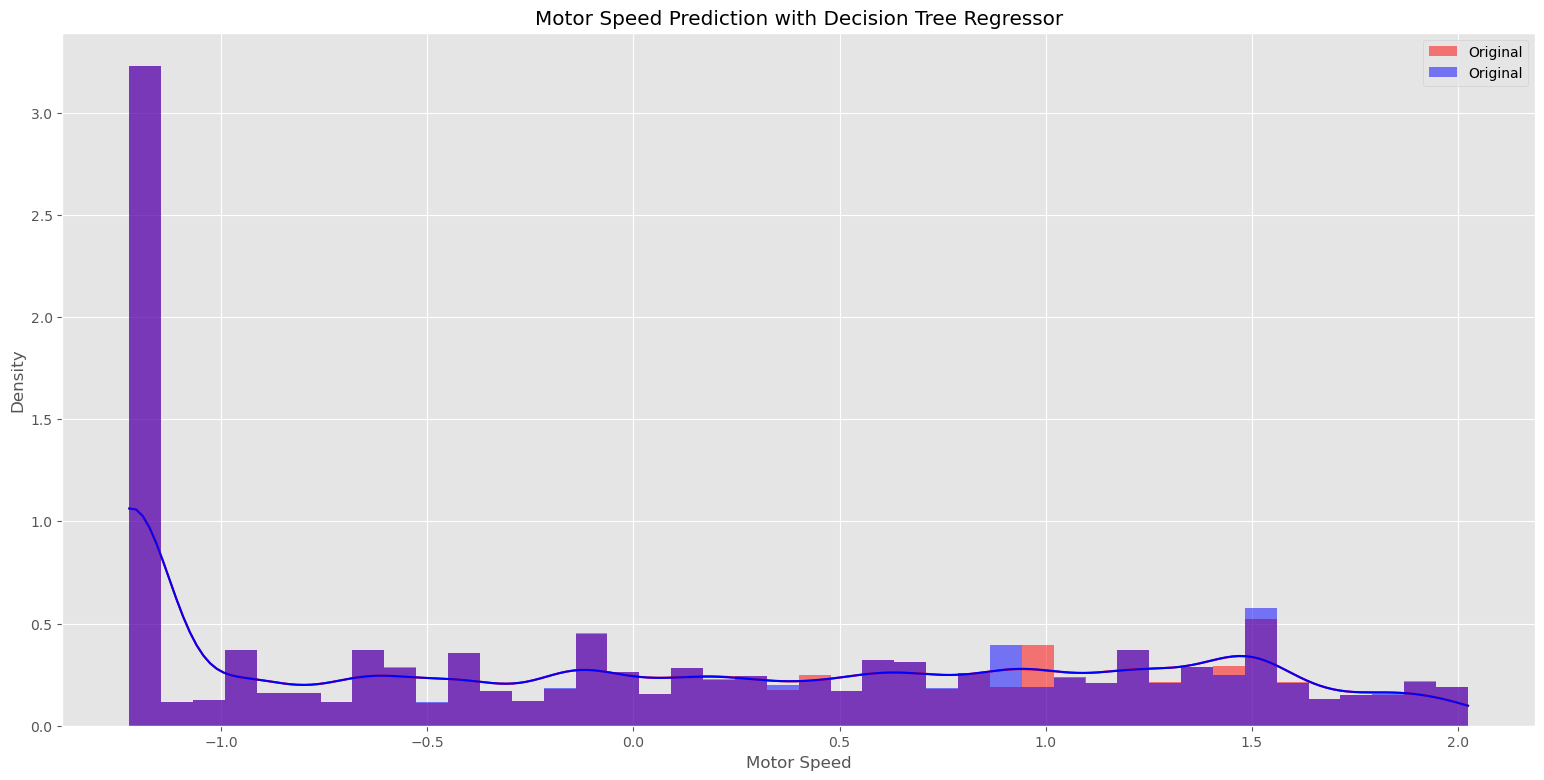

In [33]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Decision Tree Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [36]:
# Accuracies
dt_score_train = metrics.r2_score(y_train,pred_train)
dt_score_test = metrics.r2_score(y_test,pred_test)

# Errors
dt_mse_train = metrics.mean_squared_error(y_train,pred_train)
dt_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Decision Tree accuracy for train is:", dt_score_train)
print("Decision Tree accuracy for test is:", dt_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", dt_mse_train)
print("RMSE for Training: ", dt_mse_train**(1/2.0))
print("MSE for Testing: ", dt_mse_test)
print("RMSE for Testing: ", dt_mse_test**(1/2.0))

Decision Tree accuracy for train is: 0.9999783830681312
Decision Tree accuracy for test is: 0.9981854186273904
-----------------------------------------------------------
MSE: for Training  2.413470177861067e-05
RMSE for Training:  0.004912708191884663
MSE for Testing:  0.0020257586284369374
RMSE for Testing:  0.04500842841554165


In [37]:
# MAPE Score
metrics.mean_absolute_percentage_error(y_test,pred_test)

0.05796465048085137

In [38]:
np.mean(np.abs(y_test-pred_test)/np.array(y_test))

0.02047425776468678

In [40]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred_test})
performance

,True Value,Prediction,Error
492126,0.850348,0.760852,8.949536e-02
64746,-0.951890,-0.951839,-5.108261e-05
217520,0.619449,0.619449,8.917314e-07
422658,-0.548188,-0.548363,1.752000e-04
511035,-1.222426,-1.222428,1.429003e-06
...,...,...,...
790898,-1.222428,-1.222429,4.097208e-07
467756,1.469810,1.445058,2.475250e-02
64646,-0.951872,-0.951808,-6.400331e-05
150278,-0.600174,-0.600175,7.666667e-07


# Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [109]:
# Here we select the best possible hyper parameters
n_estimators= [10,30,50,100]
max_depth = [10,20,30]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)
model= RandomForestRegressor()
grid= GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=10)

In [110]:
grid_model=grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=10, n_estimators=10..............................
[CV 1/5; 1/12] END max_depth=10, n_estimators=10;, score=0.991 total time=  15.8s
[CV 2/5; 1/12] START max_depth=10, n_estimators=10..............................
[CV 2/5; 1/12] END max_depth=10, n_estimators=10;, score=0.991 total time=  15.8s
[CV 3/5; 1/12] START max_depth=10, n_estimators=10..............................
[CV 3/5; 1/12] END max_depth=10, n_estimators=10;, score=0.991 total time=  15.8s
[CV 4/5; 1/12] START max_depth=10, n_estimators=10..............................
[CV 4/5; 1/12] END max_depth=10, n_estimators=10;, score=0.991 total time=  16.0s
[CV 5/5; 1/12] START max_depth=10, n_estimators=10..............................
[CV 5/5; 1/12] END max_depth=10, n_estimators=10;, score=0.991 total time=  15.8s
[CV 1/5; 2/12] START max_depth=10, n_estimators=30..............................
[CV 1/5; 2/12] END max_depth=10, n_estimato

[CV 1/5; 11/12] END max_depth=30, n_estimators=50;, score=0.999 total time= 2.6min
[CV 2/5; 11/12] START max_depth=30, n_estimators=50.............................
[CV 2/5; 11/12] END max_depth=30, n_estimators=50;, score=0.999 total time= 2.6min
[CV 3/5; 11/12] START max_depth=30, n_estimators=50.............................
[CV 3/5; 11/12] END max_depth=30, n_estimators=50;, score=0.999 total time= 2.6min
[CV 4/5; 11/12] START max_depth=30, n_estimators=50.............................
[CV 4/5; 11/12] END max_depth=30, n_estimators=50;, score=0.999 total time= 2.6min
[CV 5/5; 11/12] START max_depth=30, n_estimators=50.............................
[CV 5/5; 11/12] END max_depth=30, n_estimators=50;, score=0.999 total time= 2.6min
[CV 1/5; 12/12] START max_depth=30, n_estimators=100............................
[CV 1/5; 12/12] END max_depth=30, n_estimators=100;, score=0.999 total time= 5.2min
[CV 2/5; 12/12] START max_depth=30, n_estimators=100............................
[CV 2/5; 12/12]

In [111]:
# Predicting the model
pred_train = grid.predict(x_train)
pred_test = grid.predict(x_test)

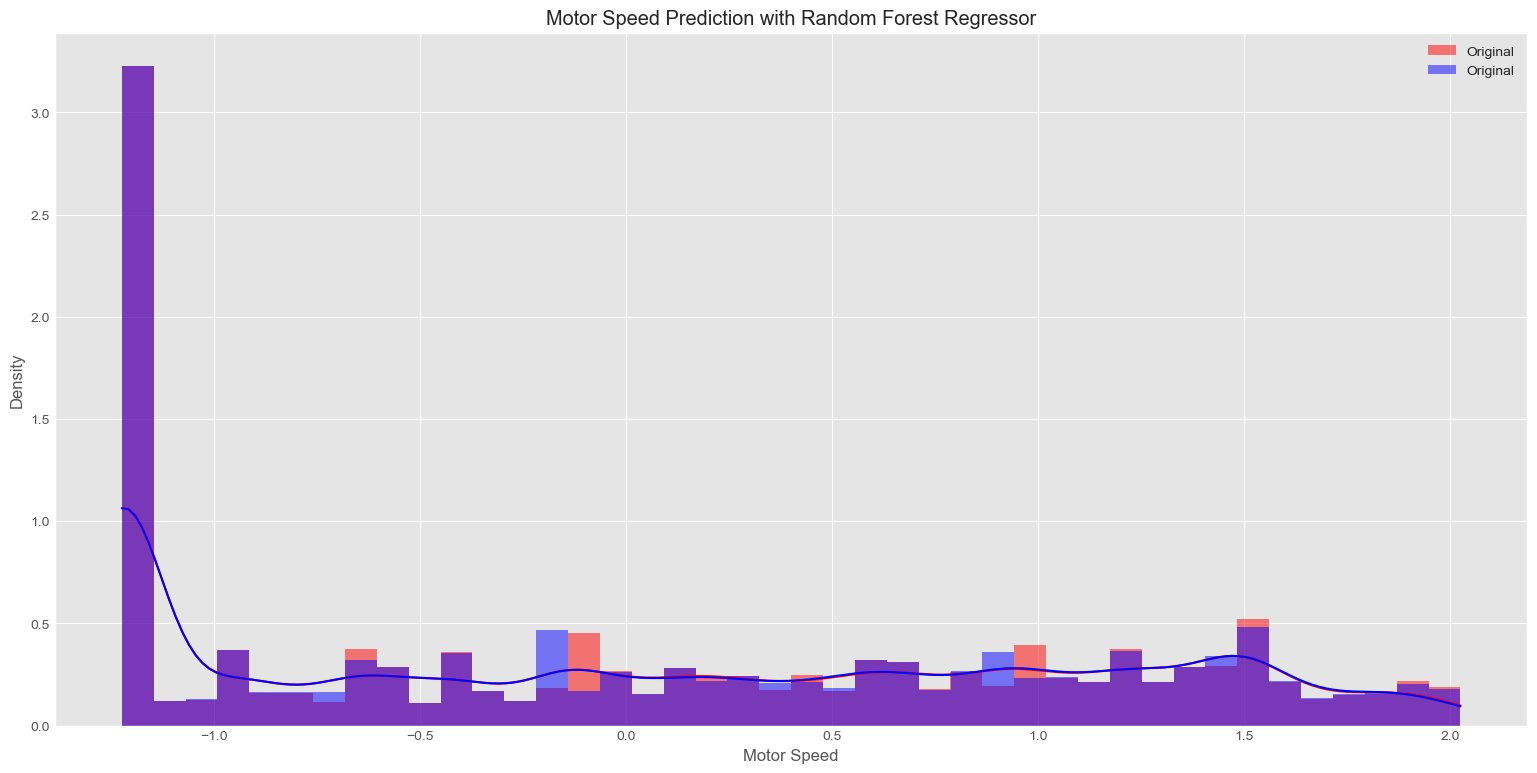

In [114]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Random Forest Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [112]:
# Accuracies
rf_score_train = metrics.r2_score(y_train,pred_train)
rf_score_test = metrics.r2_score(y_test,pred_test)

# Errors
rf_mse_train = metrics.mean_squared_error(y_train,pred_train)
rf_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Random Forest accuracy for train is:", rf_score_train)
print("Random Forest accuracy for test is:", rf_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", rf_mse_train)
print("RMSE for Training: ", rf_mse_train**(1/2.0))
print("MSE for Testing: ", rf_mse_test)
print("RMSE for Testing: ", rf_mse_test**(1/2.0))

Random Forest accuracy for train is: 0.9998591648915032
Random Forest accuracy for test is: 0.9990872669909469
-----------------------------------------------------------
MSE: for Training  0.00015723847233111568
RMSE for Training:  0.012539476557301572
MSE for Testing:  0.001018955003318188
RMSE for Testing:  0.03192107459529187


In [113]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred})
performance

,True Value,Prediction,Error
492126,0.850348,0.908029,-2.979569e-01
64746,-0.951890,-0.951875,-4.932821e-06
217520,0.619449,0.619449,1.191538e-06
422658,-0.548188,-0.553218,-2.299871e-03
511035,-1.222426,-1.222428,4.035897e-06
...,...,...,...
790898,-1.222428,-1.222427,-8.253846e-06
467756,1.469810,1.462048,3.128148e-02
64646,-0.951872,-0.951871,1.297205e-05
150278,-0.600174,-0.600172,5.702564e-07


# Bagging

In [63]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor(n_estimators=10)
model_bag.fit(x_train,y_train)

BaggingRegressor()

In [64]:
# Predicting the model
pred_train = model_bag.predict(x_train)
pred_test = model_bag.predict(x_test)

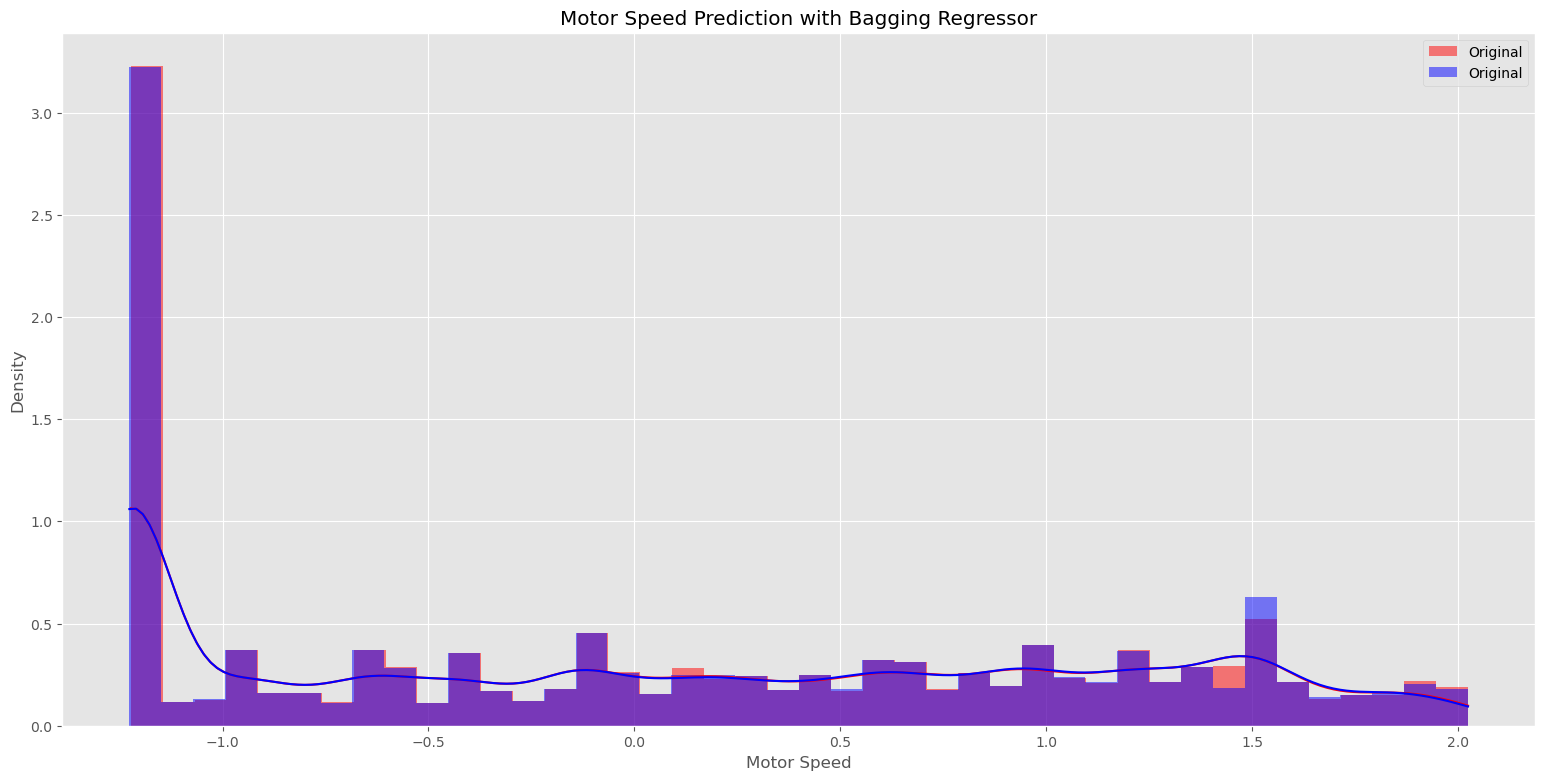

In [65]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Bagging Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [66]:
# Accuracies
bag_score_train = metrics.r2_score(y_train,pred_train)
bag_score_test = metrics.r2_score(y_test,pred_test)

# Errors
bag_mse_train = metrics.mean_squared_error(y_train,pred_train)
bag_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Bagging accuracy for train is:", bag_score_train)
print("Bagging accuracy for test is:", bag_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", bag_mse_train)
print("RMSE for Training: ", bag_mse_train**(1/2.0))
print("MSE for Testing: ", bag_mse_test)
print("RMSE for Testing: ", bag_mse_test**(1/2.0))

Bagging accuracy for train is: 0.9998120967247562
Bagging accuracy for test is: 0.9989429933271119
-----------------------------------------------------------
MSE: for Training  0.00020978876830283065
RMSE for Training:  0.014484086726571015
MSE for Testing:  0.0011800189400374718
RMSE for Testing:  0.03435140375643289


In [68]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred_test})
performance

,True Value,Prediction,Error
492126,0.850348,0.870267,-1.991929e-02
64746,-0.951890,-0.951890,-7.720000e-07
217520,0.619449,0.619448,1.968000e-06
422658,-0.548188,-0.554107,5.919096e-03
511035,-1.222426,-1.222431,4.420000e-06
...,...,...,...
790898,-1.222428,-1.222428,-1.300000e-07
467756,1.469810,1.460275,9.534930e-03
64646,-0.951872,-0.951875,2.395000e-06
150278,-0.600174,-0.600171,-3.081000e-06


# AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=30)
model_adaboost = AdaBoostRegressor(base_estimator = dtree)
model_adaboost.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30))

In [70]:
# Predicting the model
pred_train = model_adaboost.predict(x_train)
pred_test = model_adaboost.predict(x_test)

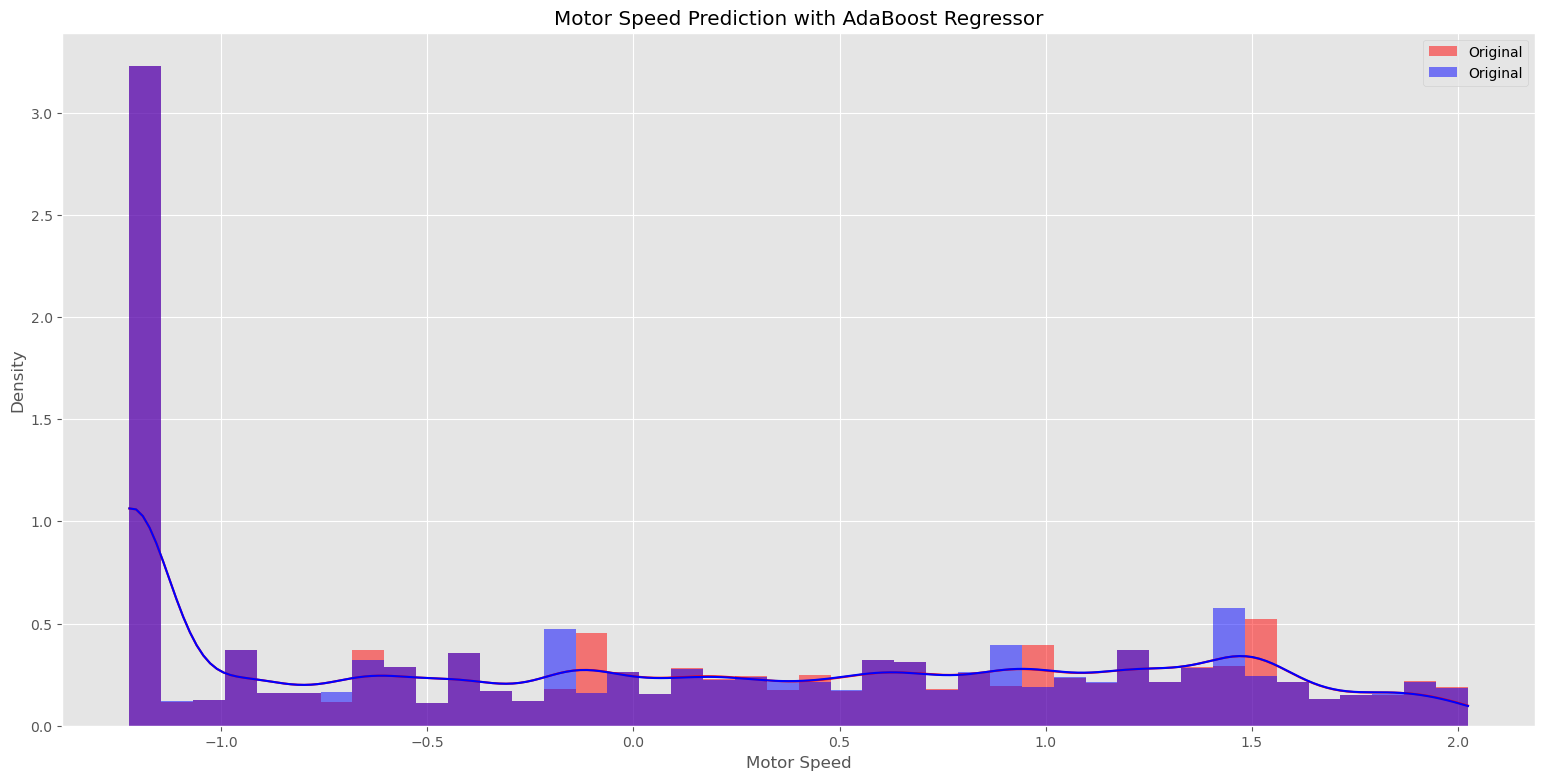

In [71]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with AdaBoost Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [72]:
# Accuracies
adb_score_train = metrics.r2_score(y_train,pred_train)
adb_score_test = metrics.r2_score(y_test,pred_test)

# Errors
adb_mse_train = metrics.mean_squared_error(y_train,pred_train)
adb_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("AdaBoost accuracy for train is:", adb_score_train)
print("AdaBoost accuracy for test is:", adb_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", adb_mse_train)
print("RMSE for Training: ", adb_mse_train**(1/2.0))
print("MSE for Testing: ", adb_mse_test)
print("RMSE for Testing: ", adb_mse_test**(1/2.0))

AdaBoost accuracy for train is: 0.9999999723375883
AdaBoost accuracy for test is: 0.999061788857734
-----------------------------------------------------------
MSE: for Training  3.088431141394491e-08
RMSE for Training:  0.0001757393280229127
MSE for Testing:  0.0010473982293821083
RMSE for Testing:  0.03236353239963321


# XGBoost

In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [74]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
# Predicting the model
pred_train = model_xgb.predict(x_train)
pred_test = model_xgb.predict(x_test)

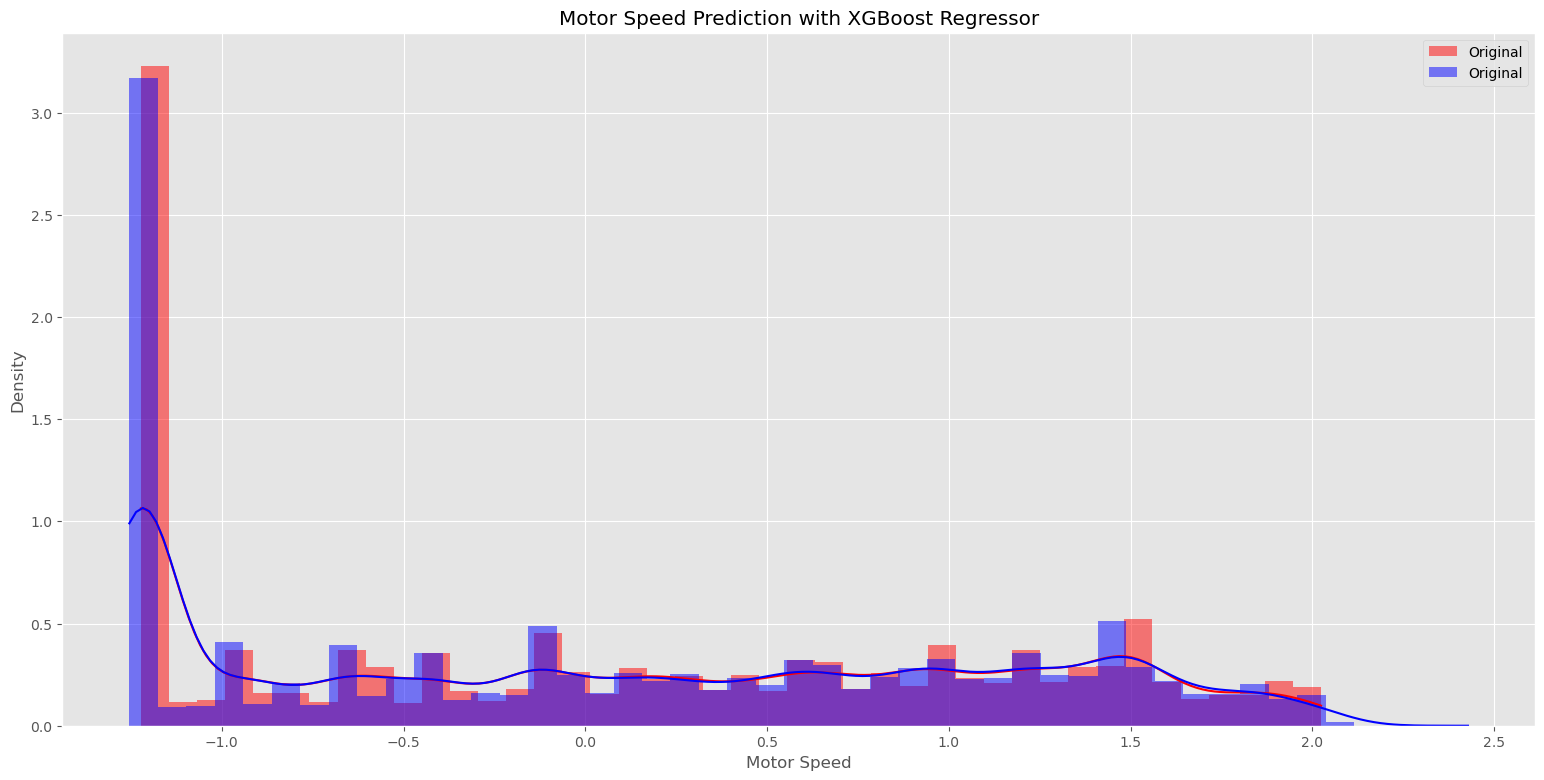

In [76]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with XGBoost Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [77]:
# Accuracies
xgb_score_train = metrics.r2_score(y_train,pred_train)
xgb_score_test = metrics.r2_score(y_test,pred_test)

# Errors
xgb_mse_train = metrics.mean_squared_error(y_train,pred_train)
xgb_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("XGBoost accuracy for train is:", xgb_score_train)
print("XGBoost accuracy for test is:", xgb_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", xgb_mse_train)
print("RMSE for Training: ", xgb_mse_train**(1/2.0))
print("MSE for Testing: ", xgb_mse_test)
print("RMSE for Testing: ", xgb_mse_test**(1/2.0))

XGBoost accuracy for train is: 0.9986463448368162
XGBoost accuracy for test is: 0.9983141066756785
-----------------------------------------------------------
MSE: for Training  0.0015113182514919468
RMSE for Training:  0.03887567686217112
MSE for Testing:  0.0018820941292133758
RMSE for Testing:  0.043383108800700024


# Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(criterion='squared_error',learning_rate=1)
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=1)

In [79]:
# Predicting the model
pred_train = model_gbr.predict(x_train)
pred_test = model_gbr.predict(x_test)

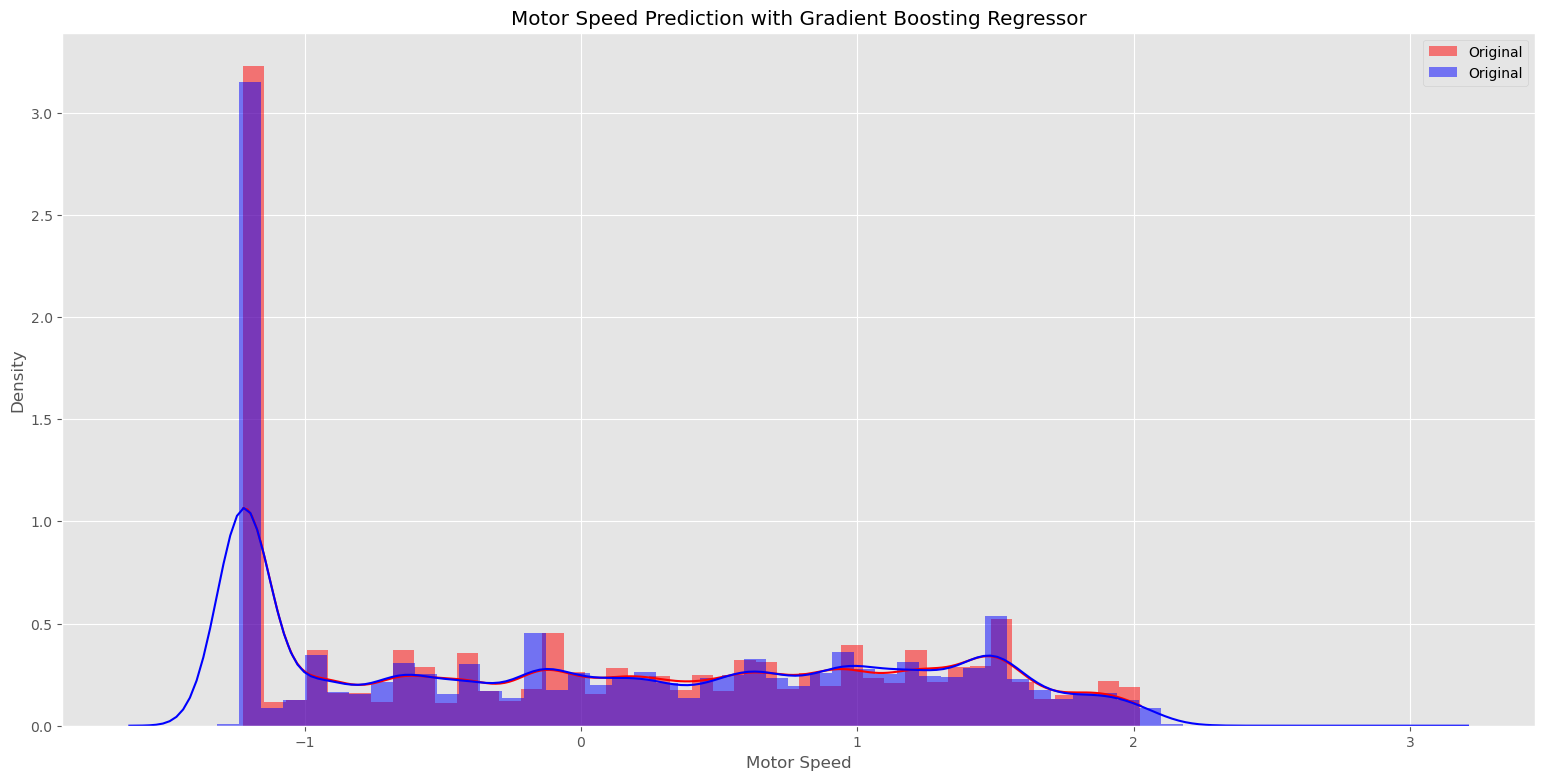

In [80]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Gradient Boosting Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [81]:
# Accuracies
gbr_score_train = metrics.r2_score(y_train,pred_train)
gbr_score_test = metrics.r2_score(y_test,pred_test)

# Errors
gbr_mse_train = metrics.mean_squared_error(y_train,pred_train)
gbr_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Gradient Boosting accuracy for train is:", gbr_score_train)
print("Gradient Boosting accuracy for test is:", gbr_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", gbr_mse_train)
print("RMSE for Training: ", gbr_mse_train**(1/2.0))
print("MSE for Testing: ", gbr_mse_test)
print("RMSE for Testing: ", gbr_mse_test**(1/2.0))

Gradient Boosting accuracy for train is: 0.9952856914506796
Gradient Boosting accuracy for test is: 0.9950810742386544
-----------------------------------------------------------
MSE: for Training  0.0052633940663257255
RMSE for Training:  0.0725492526930893
MSE for Testing:  0.005491380245657489
RMSE for Testing:  0.07410384771155604


# K-Nearest Neighbour(KNN)

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [83]:
# checking the all possible best k values using score

scores=[]
for i in range(1,40,2):
    model=KNeighborsRegressor(i)
    model.fit(x_train,y_train)
    scores.append(model.score(x_test,y_test))

In [84]:
scores

[0.998424937033391,
 0.9987193683157061,
 0.9986650253902744,
 0.998604697998944,
 0.9985184179456116,
 0.9984378036188799,
 0.9983600407019098,
 0.9982737653222388,
 0.9982058857304642,
 0.9981362431511865,
 0.9980687612918802,
 0.997995703408313,
 0.9979345734083583,
 0.9978713261721563,
 0.9978180891243252,
 0.9977581621886871,
 0.9977050849845787,
 0.9976498991436127,
 0.9975930122890924,
 0.9975436618569007]

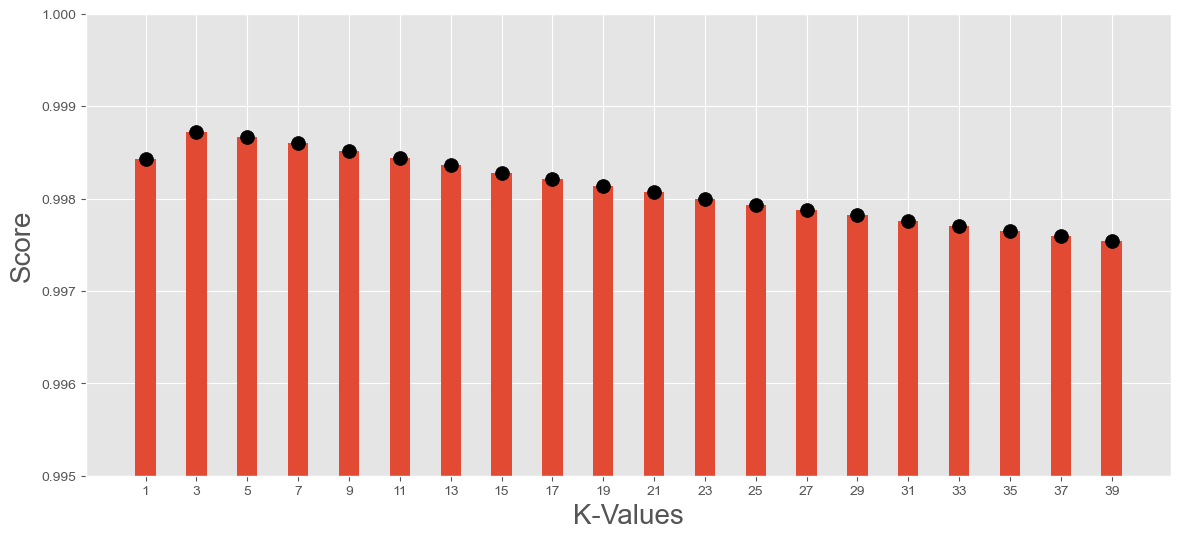

In [85]:
plt.figure(figsize=(14,6))
plt.bar(range(1,40,2),scores)
plt.xticks(range(1,40,2))
plt.xlabel("K-Values",size=20)
plt.ylabel("Score",size=20)
plt.ylim(0.995,1)
plt.style.use("seaborn-darkgrid")
plt.scatter(range(1,40,2),scores,s=100,color="Black")
plt.show()

In [86]:
max(scores)

0.9987193683157061

In [87]:
# Here we are write a for loop to find the all possible best k values using mean squared error.

mse=[]
for i in range(1,40,2):
    model=KNeighborsRegressor(i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    mse.append(metrics.mean_squared_error(y_test,pred))

In [88]:
mse

[0.0017583655619428896,
 0.0014296689712940615,
 0.0014903362148520171,
 0.0015576843841670807,
 0.0016540055330218617,
 0.001744001589642536,
 0.0018308143952861238,
 0.0019271303265682382,
 0.002002909605914816,
 0.0020806570456317415,
 0.0021559923052218303,
 0.002237552515331754,
 0.0023057966992155064,
 0.002376404518955679,
 0.002435837185147522,
 0.002502738294558864,
 0.0025619925147437753,
 0.0026236007706157897,
 0.0026871080005084007,
 0.0027422017347097875]

In [89]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.0878848766034724

In [90]:
min(mse)

0.0014296689712940615

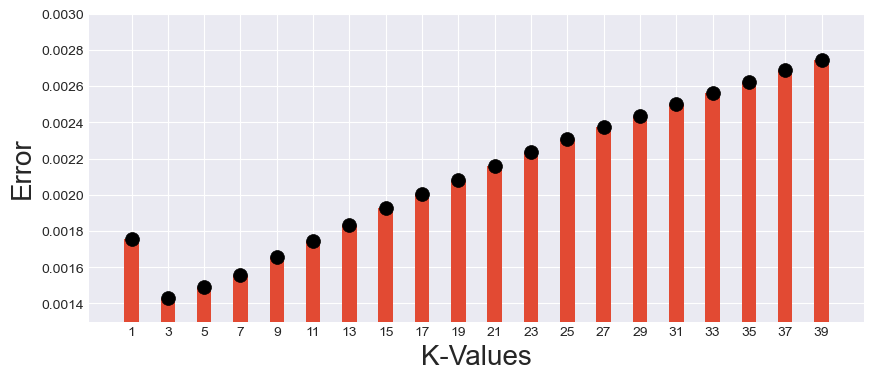

In [91]:
plt.figure(figsize=(10,4))
plt.bar(range(1,40,2),mse)
plt.xticks(range(1,40,2))
plt.xlabel("K-Values",size=20)
plt.ylabel("Error",size=20)
plt.ylim(0.0013,0.003)
plt.style.use("seaborn-darkgrid")
plt.scatter(range(1,40,2),mse,s=100,color="Black")
plt.show()

## Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# finding the all possible best k values using cross validation techniques
cv_score=[]

for i in range(1,40,2):
    model=KNeighborsRegressor(i)
    scores=cross_val_score(model,x_train,y_train,cv=5)
    cv_score.append(scores.mean())

In [94]:
cv_score

[0.998192508895676,
 0.9985141427758354,
 0.9984599167618097,
 0.9983744885966332,
 0.9982819827123824,
 0.9981956906827104,
 0.9981100417276251,
 0.9980220997036792,
 0.9979408615753229,
 0.9978597285975528,
 0.9977796632637392,
 0.997704228835331,
 0.9976297773374629,
 0.9975566642062791,
 0.9974858391577376,
 0.9974174631265287,
 0.9973471824866905,
 0.9972810089424907,
 0.9972134243569352,
 0.9971447919193583]

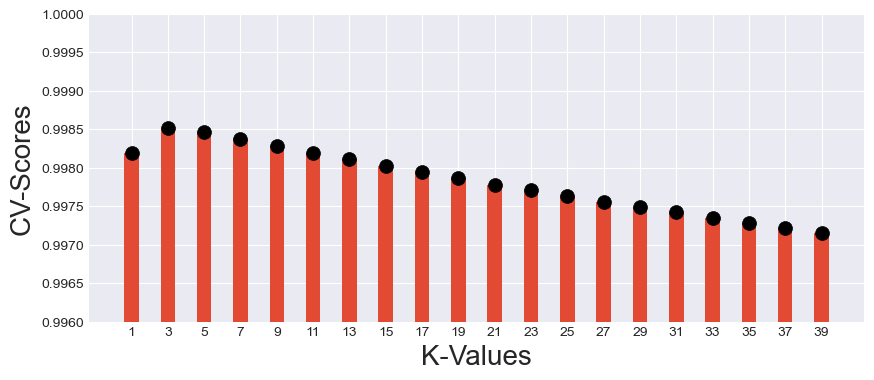

In [95]:
plt.figure(figsize=(10,4))
plt.bar(range(1,40,2),cv_score)
plt.xticks(range(1,40,2))
plt.xlabel("K-Values",size=20)
plt.ylabel("CV-Scores",size=20)
plt.ylim(0.996,1)
plt.style.use("seaborn-darkgrid")
plt.scatter(range(1,40,2),cv_score,s=100,color="Black")
plt.show()

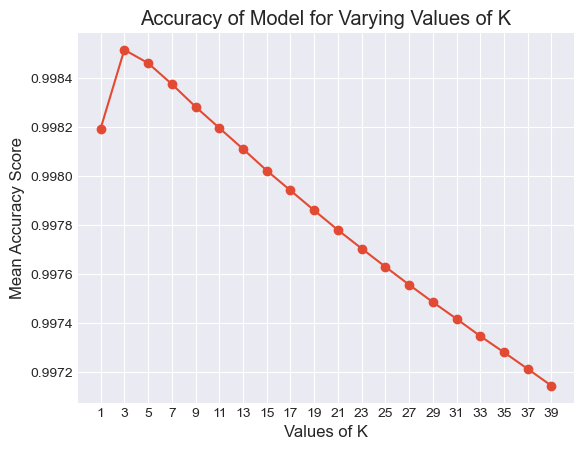

In [96]:
# plot for k value
plt.plot(range(1,40,2),cv_score, marker='o')
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(range(1,40,2))
plt.rcParams['figure.figsize'] = (5,5) 
plt.show()

In [97]:
# Final model
final_model=KNeighborsRegressor(3)
final_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [98]:
# Predicting the model
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)

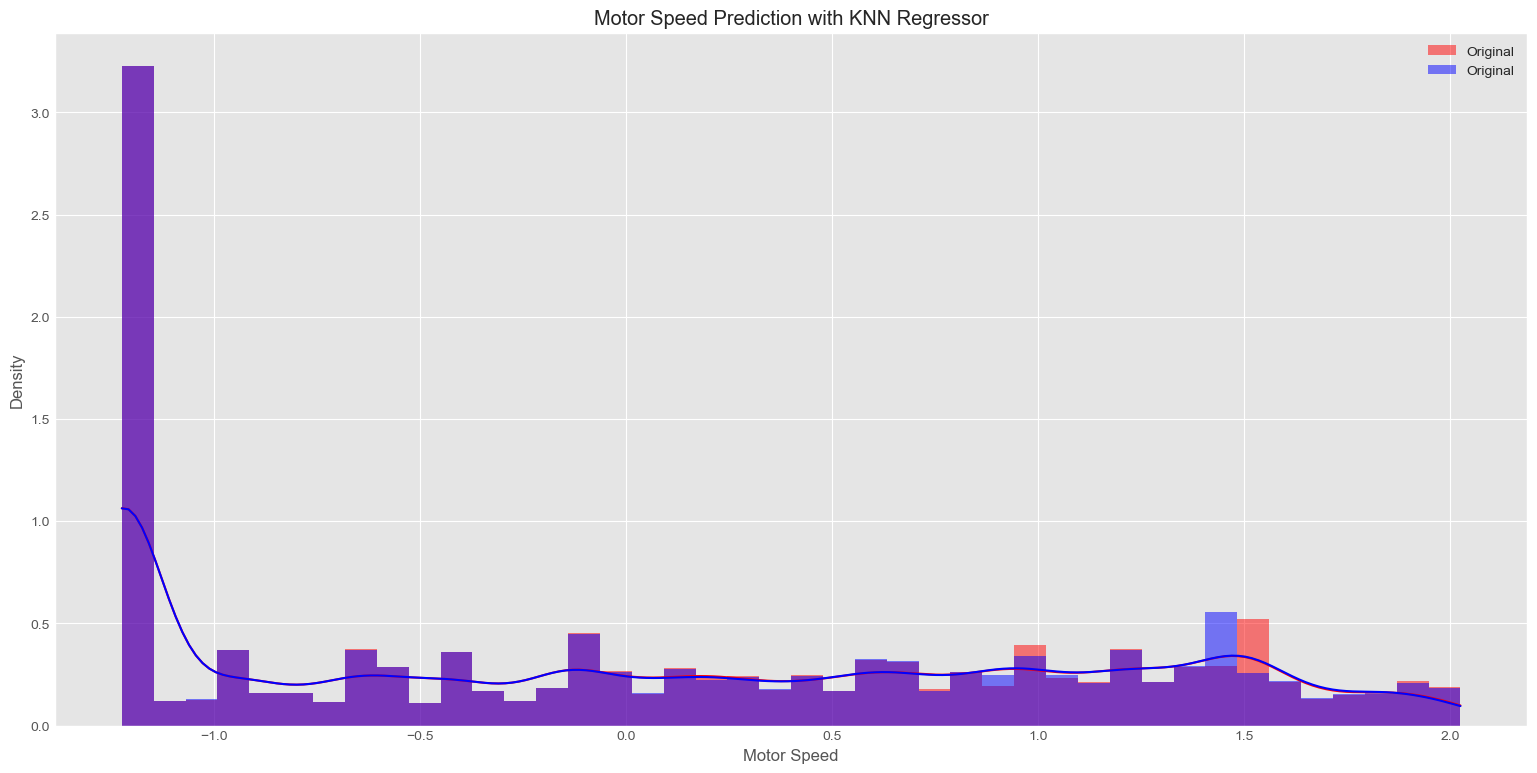

In [99]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with KNN Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [100]:
# Accuracies
knn_score_train = metrics.r2_score(y_train,pred_train)
knn_score_test = metrics.r2_score(y_test,pred_test)

# Errors
knn_mse_train = metrics.mean_squared_error(y_train,pred_train)
knn_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("KNN accuracy for train is:", knn_score_train)
print("KNN accuracy for test is:", knn_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", knn_mse_train)
print("RMSE for Training: ", knn_mse_train**(1/2.0))
print("MSE for Testing: ", knn_mse_test)
print("RMSE for Testing: ", knn_mse_test**(1/2.0))

KNN accuracy for train is: 0.9993730279377161
KNN accuracy for test is: 0.9987193683157061
-----------------------------------------------------------
MSE: for Training  0.0006999968283478365
RMSE for Training:  0.026457453171986084
MSE for Testing:  0.0014296689712940615
RMSE for Testing:  0.03781096363879214


In [101]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred_test})

In [102]:
performance

,True Value,Prediction,Error
492126,0.850348,0.894813,-4.446538e-02
64746,-0.951890,-0.951887,-3.546667e-06
217520,0.619449,0.619448,1.690000e-06
422658,-0.548188,-0.545925,-2.262840e-03
511035,-1.222426,-1.222430,4.033333e-06
...,...,...,...
790898,-1.222428,-1.222428,-5.000000e-07
467756,1.469810,1.399211,7.059943e-02
64646,-0.951872,-0.951886,1.320000e-05
150278,-0.600174,-0.600175,1.340000e-06


# Stacking

In [103]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet

estimators = [('els',ElasticNet()),('dtr',DecisionTreeRegressor(max_depth=30)),('grad',GradientBoostingRegressor(criterion='squared_error',learning_rate=1))]
stack = StackingRegressor(estimators=estimators)
stack.fit(x_train,y_train)

StackingRegressor(estimators=[('els', ElasticNet()),
                              ('dtr', DecisionTreeRegressor(max_depth=30)),
                              ('grad',
                               GradientBoostingRegressor(criterion='squared_error',
                                                         learning_rate=1))])

In [104]:
# Predicting the model
pred_train = stack.predict(x_train)
pred_test = stack.predict(x_test)

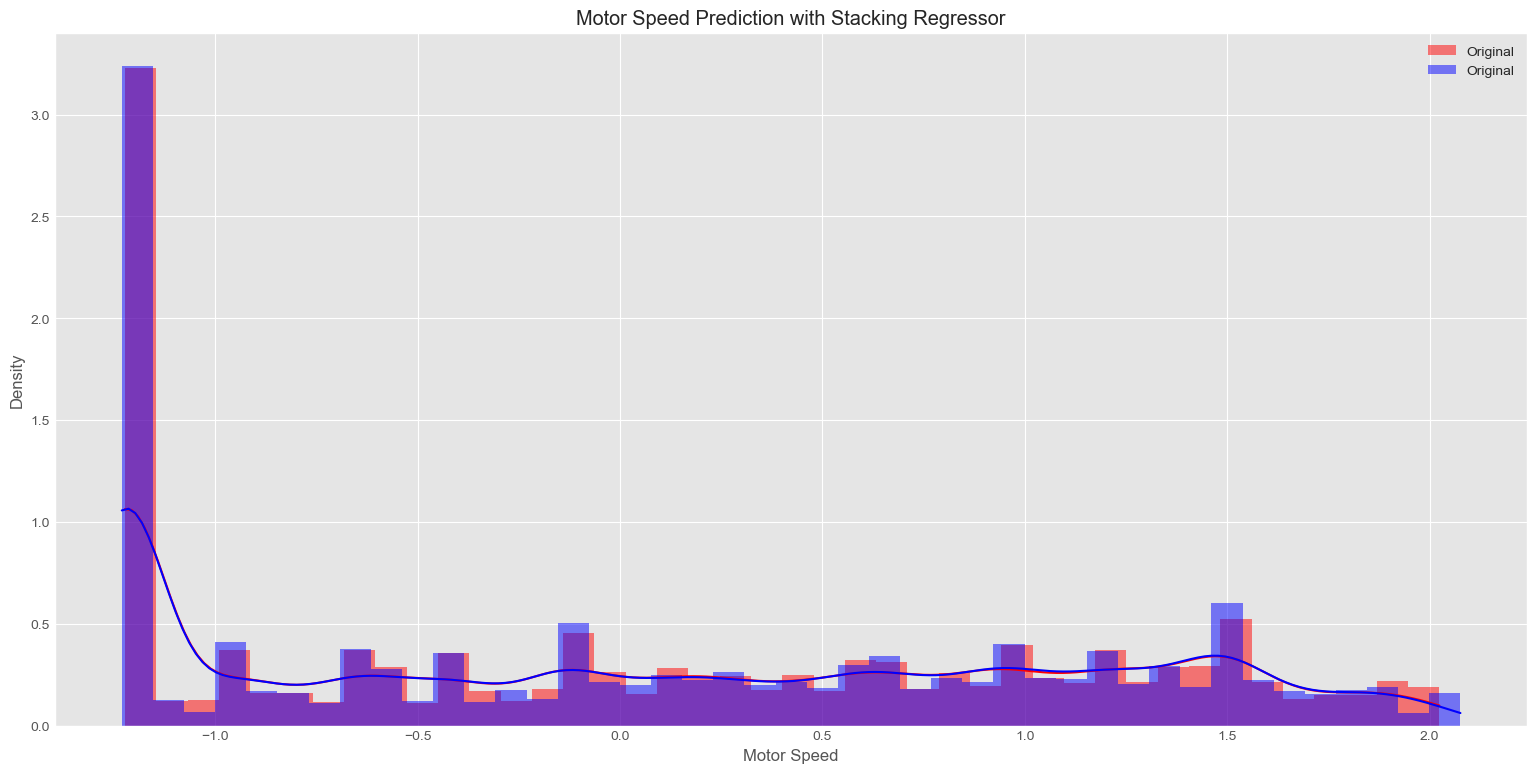

In [105]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Stacking Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [106]:
# Accuracies
stk_score_train = metrics.r2_score(y_train,pred_train)
stk_score_test = metrics.r2_score(y_test,pred_test)

# Errors
stk_mse_train = metrics.mean_squared_error(y_train,pred_train)
stk_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Stacking accuracy for train is:", stk_score_train)
print("Stacking accuracy for test is:", stk_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", stk_mse_train)
print("RMSE for Training: ", stk_mse_train**(1/2.0))
print("MSE for Testing: ", stk_mse_test)
print("RMSE for Testing: ", stk_mse_test**(1/2.0))

Stacking accuracy for train is: 0.9997352518917891
Stacking accuracy for test is: 0.9983434056639326
-----------------------------------------------------------
MSE: for Training  0.00029558388197330914
RMSE for Training:  0.017192553096422567
MSE for Testing:  0.001849385384840561
RMSE for Testing:  0.04300448098559685


In [107]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred_test})
performance

,True Value,Prediction,Error
492126,0.850348,0.791202,0.059146
64746,-0.951890,-0.955476,0.003585
217520,0.619449,0.623673,-0.004223
422658,-0.548188,-0.545404,-0.002784
511035,-1.222426,-1.222004,-0.000422
...,...,...,...
790898,-1.222428,-1.222183,-0.000245
467756,1.469810,1.449017,0.020793
64646,-0.951872,-0.955454,0.003582
150278,-0.600174,-0.598512,-0.001662


# Support Vector Regressor(SVR)

In [58]:
from sklearn.svm import LinearSVR
svr = LinearSVR(loss='epsilon_insensitive',epsilon=0.1)
svr.fit(x_train,y_train)

LinearSVR(epsilon=0.1)

In [59]:
# Predicting the model
pred_train = svr.predict(x_train)
pred_test = svr.predict(x_test)

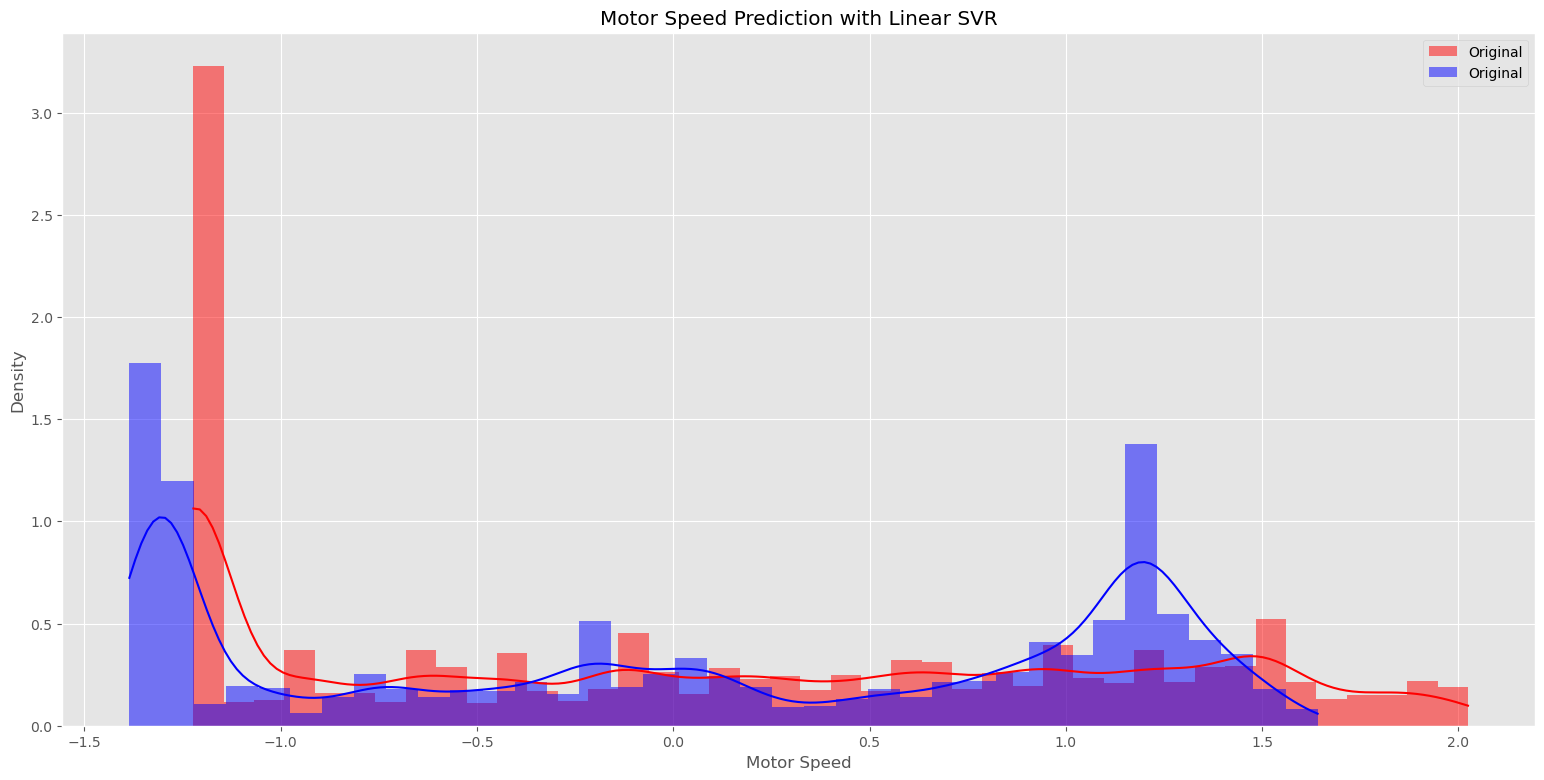

In [60]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Linear SVR")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [61]:
# Accuracies
svr_score_train = metrics.r2_score(y_train,pred_train)
svr_score_test = metrics.r2_score(y_test,pred_test)

# Errors
svr_mse_train = metrics.mean_squared_error(y_train,pred_train)
svr_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Linear SVR accuracy for train is:", svr_score_train)
print("Linear SVR accuracy for test is:", svr_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", svr_mse_train)
print("RMSE for Training: ", svr_mse_train**(1/2.0))
print("MSE for Testing: ", svr_mse_test)
print("RMSE for Testing: ", svr_mse_test**(1/2.0))

Linear SVR accuracy for train is: 0.9448584445770325
Linear SVR accuracy for test is: 0.9452234180210478
-----------------------------------------------------------
MSE: for Training  0.06156400935256102
RMSE for Training:  0.24812095710068713
MSE for Testing:  0.0611513681640877
RMSE for Testing:  0.24728802673014255


In [62]:
# Perfomance of model
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': pred_test,
                            'Error': y_test - pred_test})
performance

,True Value,Prediction,Error
492126,0.850348,1.148317,-0.297969
64746,-0.951890,-0.877766,-0.074124
217520,0.619449,0.794140,-0.174690
422658,-0.548188,-0.219960,-0.328227
511035,-1.222426,-1.321487,0.099061
...,...,...,...
790898,-1.222428,-1.291309,0.068881
467756,1.469810,1.319798,0.150012
64646,-0.951872,-0.876732,-0.075140
150278,-0.600174,-0.514026,-0.086148


# Neural Network

In [48]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [52]:
# Creating a function for model building

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 4,kernel_initializer = 'uniform',activation='relu'))
    model.add(Dense(16,input_dim = 16,kernel_initializer = 'uniform',activation='relu'))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation='elu'))
    model.add(Dense(1,activation = 'linear'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
    return model

In [53]:
ann= KerasRegressor(build_fn=create_model,batch_size=500,epochs=20,verbose=0)

In [54]:
ann.fit(x_train,y_train)

In [55]:
# Predicting the model
pred_train = ann.predict(x_train)
pred_test = ann.predict(x_test)

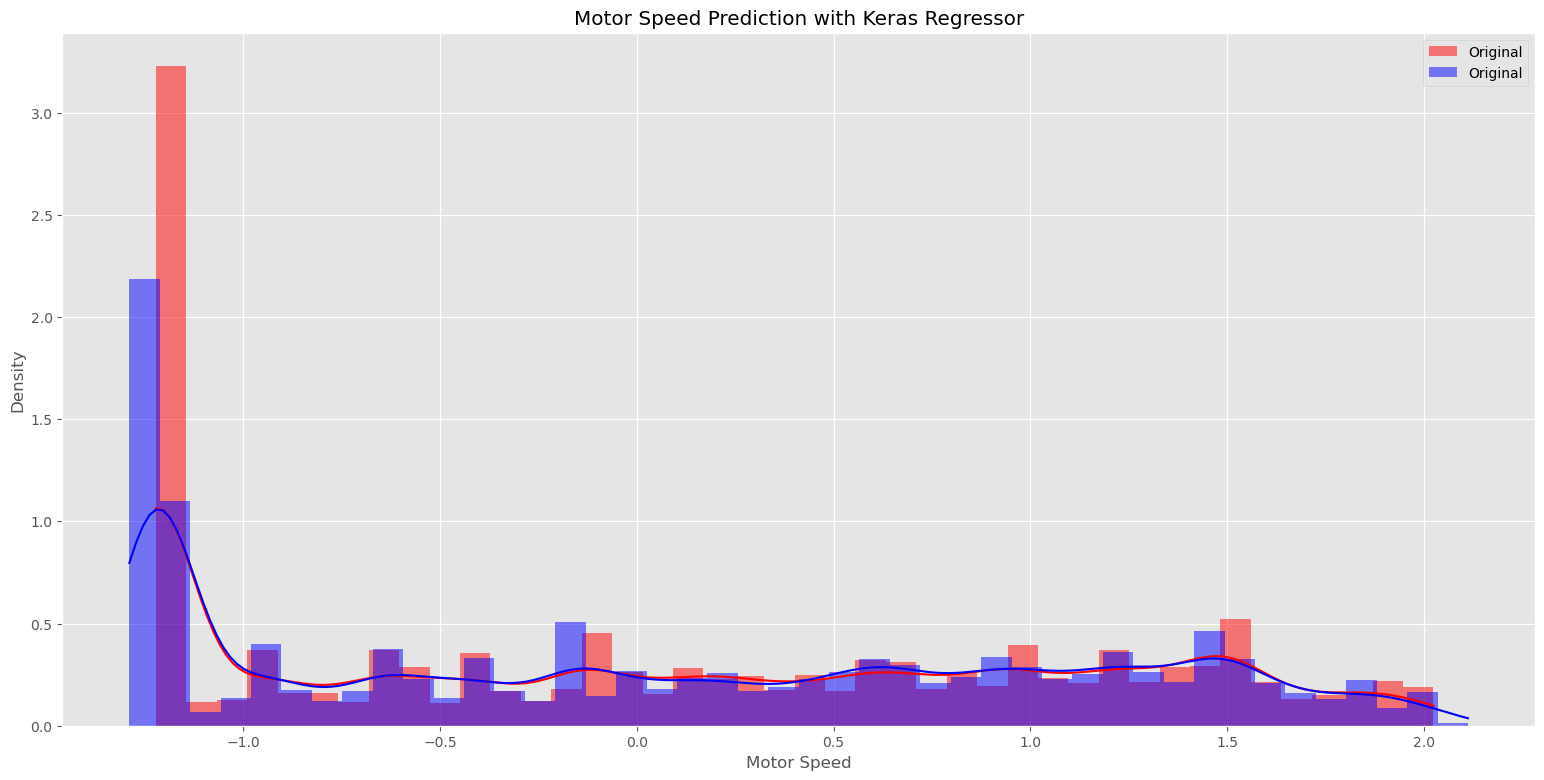

In [56]:
# Visualization

plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sns.histplot(y_test,color='red',kde=True,stat="density",linewidth=0,label='Original')
sns.histplot(pred_test,color='blue',kde=True,stat="density",linewidth=0,label='Original')
plt.legend(loc='upper right')
plt.title("Motor Speed Prediction with Keras Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [57]:
# Accuracies
nn_score_train = metrics.r2_score(y_train,pred_train)
nn_score_test = metrics.r2_score(y_test,pred_test)

# Errors
nn_mse_train = metrics.mean_squared_error(y_train,pred_train)
nn_mse_test = metrics.mean_squared_error(y_test,pred_test)

print("Neural Network accuracy for train is:", nn_score_train)
print("Neural Network accuracy for test is:", nn_score_test)
print("-----------------------------------------------------------")
print("MSE: for Training ", nn_mse_train)
print("RMSE for Training: ", nn_mse_train**(1/2.0))
print("MSE for Testing: ", nn_mse_test)
print("RMSE for Testing: ", nn_mse_test**(1/2.0))

Neural Network accuracy for train is: 0.9965784278863686
Neural Network accuracy for test is: 0.9966854632022931
-----------------------------------------------------------
MSE: for Training  0.003820089875744107
RMSE for Training:  0.061806875634868544
MSE for Testing:  0.0037002757873405277
RMSE for Testing:  0.06082989221871536


### Putting all the scores and errors in a table.

In [115]:
results = {
    'Model Name': ['Multi Linear','Quadratic','Cubic','Square Root','Cube Root','Decision Tree','Random Forest','Bagging','AdaBoost','XGBoost','Gradient Boosting','KNN','Stacking','Support Vector Machine','Neural Network'],
    'Training Accuracy': [acc_normal,acc_squared,acc_cb,acc_sqrt,acc_cbrt,dt_score_train,rf_score_train,bag_score_train,adb_score_train,xgb_score_train,gbr_score_train,knn_score_train,stk_score_train,svr_score_train,nn_score_train],
    'Testing Accuracy': [acc_normal,acc_squared,acc_cb,acc_sqrt,acc_cbrt,dt_score_test,rf_score_test,bag_score_test,adb_score_test,xgb_score_test,gbr_score_test,knn_score_test,stk_score_test,svr_score_test,nn_score_test],
    'Training Error-MSE': [err_normal,err_squared,err_cb,err_sqrt,err_cbrt,dt_mse_train,rf_mse_train,bag_mse_train,adb_mse_train,xgb_mse_train,gbr_mse_train,knn_mse_train,stk_mse_train,svr_mse_train,nn_mse_train],
    'Testing Error-MSE': [err_normal,err_squared,err_cb,err_sqrt,err_cbrt,dt_mse_test,rf_mse_test,bag_mse_test,adb_mse_test,xgb_mse_test,gbr_mse_test,knn_mse_test,stk_mse_test,svr_mse_test,nn_mse_test]
    }

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training Error-MSE,Testing Error-MSE
0,Multi Linear,0.946000,0.946000,6.000000e-02,0.060000
1,Quadratic,0.949000,0.949000,5.700000e-02,0.057000
2,Cubic,0.968000,0.968000,3.530000e-02,0.035300
3,Square Root,0.950000,0.950000,4.900000e-03,0.004900
4,Cube Root,0.958000,0.958000,4.100000e-03,0.004100
5,Decision Tree,0.999978,0.998185,2.413470e-05,0.002026
6,Random Forest,0.999859,0.999087,1.572385e-04,0.001019
7,Bagging,0.999812,0.998943,2.097888e-04,0.001180
8,AdaBoost,1.000000,0.999062,3.088431e-08,0.001047
9,XGBoost,0.998646,0.998314,1.511318e-03,0.001882


In [116]:
results_df.sort_values(by=['Testing Accuracy'],ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training Error-MSE,Testing Error-MSE
6,Random Forest,0.999859,0.999087,1.572385e-04,0.001019
8,AdaBoost,1.000000,0.999062,3.088431e-08,0.001047
7,Bagging,0.999812,0.998943,2.097888e-04,0.001180
11,KNN,0.999373,0.998719,6.999968e-04,0.001430
12,Stacking,0.999735,0.998343,2.955839e-04,0.001849
9,XGBoost,0.998646,0.998314,1.511318e-03,0.001882
5,Decision Tree,0.999978,0.998185,2.413470e-05,0.002026
14,Neural Network,0.996578,0.996685,3.820090e-03,0.003700
10,Gradient Boosting,0.995286,0.995081,5.263394e-03,0.005491
2,Cubic,0.968000,0.968000,3.530000e-02,0.035300


In [117]:
results_df.sort_values(by=['Training Accuracy'],ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training Error-MSE,Testing Error-MSE
8,AdaBoost,1.000000,0.999062,3.088431e-08,0.001047
5,Decision Tree,0.999978,0.998185,2.413470e-05,0.002026
6,Random Forest,0.999859,0.999087,1.572385e-04,0.001019
7,Bagging,0.999812,0.998943,2.097888e-04,0.001180
12,Stacking,0.999735,0.998343,2.955839e-04,0.001849
11,KNN,0.999373,0.998719,6.999968e-04,0.001430
9,XGBoost,0.998646,0.998314,1.511318e-03,0.001882
14,Neural Network,0.996578,0.996685,3.820090e-03,0.003700
10,Gradient Boosting,0.995286,0.995081,5.263394e-03,0.005491
2,Cubic,0.968000,0.968000,3.530000e-02,0.035300


### Here we find that our best model to proceed is AdaBoost Regressor